In [ ]:
!pip install -U pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=d1a787e0372d04de2968e1238ecd797ccddbfefe7adf4795d402ecee6e27764b
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandasql import sqldf
import pandas as pd
from sklearn import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df_hosp_admissions = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/admissions.csv")
df_diagnoses_icd = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/diagnoses_icd.csv",nrows=100000)
df_drgcodes_icd = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/drgcodes.csv",nrows=100000)


In [ ]:
print(df_diagnoses_icd.shape)
print(df_drgcodes_icd.shape)

(1000, 5)
(1000, 7)


In [ ]:
df_hosp_admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [ ]:
# import pandas as pd

# # Assuming 'admissions' is your DataFrame containing the 'subject_id' and 'hadm_id' columns
# # Exclude rows with subject_id linked to more than 10 hadm_ids
# df_hosp_admissions = df_hosp_admissions.groupby('subject_id').filter(lambda x: len(x['hadm_id']) <= 10)

# # Exclude rows with subject_id having only one hadm_id
# df_hosp_admissions = df_hosp_admissions.groupby('subject_id').filter(lambda x: len(x['hadm_id']) > 1)
# df_hosp_admissions

In [ ]:
# df_hosp_admissions = df_hosp_admissions.head(100000)

In [ ]:
# # number of patients
# unique_rows_count = df_hosp_admissions['subject_id'].nunique()

# print("Number of patients:", unique_rows_count)

Number of patients: 75167


In [ ]:
# # number of visits
# unique_rows_count = df_hosp_admissions['hadm_id'].nunique()
# print("Number of visits:", unique_rows_count)

Number of visits: 251006


In [ ]:
# count 0 values (not dead)
import pandas as pd

# Assuming 'df' is your DataFrame
# nan_rows_count = filtered_df.isnull().sum(axis=1).sum()
nan_count = df_hosp_admissions['deathtime'].isnull().sum()

print("Number of rows with NaN values:", nan_count)


Number of rows with NaN values: 422633


In [ ]:
# count 1 values, (dead)
not_nan_count = df_hosp_admissions['deathtime'].notnull().sum()
print("Number of rows with not NaN values:", not_nan_count)


Number of rows with not NaN values: 8598


In [ ]:
df_hosp_admissions['deathtime'] = df_hosp_admissions['deathtime'].notnull().astype(int)
df_hosp_admissions.fillna(0, inplace=True)


In [ ]:
count = (df_hosp_admissions['deathtime'] == 1).sum()
print(count)

8598


In [ ]:
count = (df_hosp_admissions['deathtime'] == 0).sum()
print(count)

422633


In [ ]:

# Filter rows with '0' in 'deathtime' column and select 1000 random samples
df_zero = df_hosp_admissions[df_hosp_admissions['deathtime'] == 0].sample(n=100000, random_state=42)

# Filter rows with '1' in 'deathtime' column
df_one = df_hosp_admissions[df_hosp_admissions['deathtime'] == 1]

# Concatenate the two filtered DataFrames
result_df = pd.concat([df_zero, df_one])
# Shuffle the rows
df_hosp_admissions = result_df.sample(frac=1, random_state=42)
df_hosp_admissions


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
166368,13879853,23827923,2143-09-07 19:11:00,2143-09-08 15:06:00,0,OBSERVATION ADMIT,P03MDI,WALK-IN/SELF REFERRAL,HOME,Medicare,ENGLISH,SINGLE,WHITE,2143-09-07 07:49:00,2143-09-07 22:12:00,0
105920,12475244,24898095,2136-12-03 01:51:00,2136-12-04 14:48:00,0,URGENT,P41V12,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,2136-12-02 20:34:00,2136-12-02 22:58:00,0
287010,16662316,22170486,2176-10-02 07:27:00,2176-10-04 06:10:00,0,EW EMER.,P21E4S,EMERGENCY ROOM,AGAINST ADVICE,Medicare,ENGLISH,DIVORCED,WHITE,2176-10-01 23:07:00,2176-10-02 18:19:00,0
9877,10243868,21949934,2120-10-14 13:45:00,2120-10-15 13:15:00,0,SURGICAL SAME DAY ADMISSION,P89ZCW,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,0,0,0
218133,15077817,23869912,2117-11-16 12:05:00,2117-11-26 17:40:00,1,EW EMER.,P961O3,EMERGENCY ROOM,DIED,Medicare,ENGLISH,SINGLE,WHITE,2117-11-16 09:45:00,2117-11-16 14:28:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90198,12116314,24529183,2172-09-01 05:12:00,2172-10-08 15:55:00,0,EW EMER.,P233F6,TRANSFER FROM HOSPITAL,REHAB,Other,ENGLISH,0,UNKNOWN,2172-09-01 03:31:00,2172-09-01 07:25:00,0
403600,19356835,23003162,2135-03-03 00:00:00,2135-03-08 14:16:00,0,SURGICAL SAME DAY ADMISSION,P13ZRJ,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,0,0,0
185177,14308397,26975424,2129-03-28 06:00:00,2129-03-31 16:20:00,1,EW EMER.,P01T18,TRANSFER FROM HOSPITAL,DIED,Other,ENGLISH,SINGLE,ASIAN,2129-03-28 02:38:00,2129-03-28 07:33:00,1
382443,18860718,25256686,2119-06-05 18:06:00,2119-06-07 17:50:00,0,OBSERVATION ADMIT,P43HX7,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,WHITE,2119-06-05 09:49:00,2119-06-05 19:47:00,0


In [ ]:
import pandas as pd
import sqlite3

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Convert the DataFrame to a SQL table
df_hosp_admissions.to_sql('df_hosp_admissions', conn, index=False)
df_diagnoses_icd.to_sql('df_diagnoses_icd', conn, index=False)
df_drgcodes_icd.to_sql('df_drgcodes_icd', conn, index=False)


query = '''
SELECT df_hosp_admissions.subject_id, df_hosp_admissions.hadm_id, df_hosp_admissions.admittime, df_hosp_admissions.dischtime,
df_hosp_admissions.deathtime, df_hosp_admissions.admission_type,

df_diagnoses_icd.icd_code,
df_drgcodes_icd.drg_code

FROM df_hosp_admissions
JOIN df_diagnoses_icd ON df_hosp_admissions.subject_id = df_diagnoses_icd.subject_id
JOIN df_drgcodes_icd ON df_diagnoses_icd.subject_id = df_drgcodes_icd.subject_id

'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
# conn.close()

# Print the resulting DataFrame
df


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,icd_code,drg_code
0,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,301
1,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,301
2,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,301
3,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,467
4,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,470
...,...,...,...,...,...,...,...,...
5690978,10163774,27987223,2127-07-25 13:32:00,2127-07-26 14:42:00,0,DIRECT OBSERVATION,Z9861,864
5690979,10163774,27987223,2127-07-25 13:32:00,2127-07-26 14:42:00,0,DIRECT OBSERVATION,Z9889,177
5690980,10163774,27987223,2127-07-25 13:32:00,2127-07-26 14:42:00,0,DIRECT OBSERVATION,Z9889,265
5690981,10163774,27987223,2127-07-25 13:32:00,2127-07-26 14:42:00,0,DIRECT OBSERVATION,Z9889,722


In [ ]:
count = (df['deathtime'] == 1).sum()
print(count)

153907


In [ ]:
count = (df['deathtime'] == 0).sum()
print(count)

5537076


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'deathtime' column
# Filter rows with 'deathtime' equal to 1
rows_with_1 = df[df['deathtime'] == 1]

# Sample 1000 rows with 'deathtime' equal to 0
rows_with_0 = df[df['deathtime'] == 0].sample(n=153907, random_state=42)

# Concatenate the two subsets of rows
df = pd.concat([rows_with_1, rows_with_0])
df.sample(frac=1, random_state=42)

df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,icd_code,drg_code
6094,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,A4150,720
6095,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,A4150,871
6096,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,C710,720
6097,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,C710,871
6098,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,E8339,720
...,...,...,...,...,...,...,...,...
866492,10205925,27363698,2189-04-11 01:10:00,2189-04-15 13:15:00,0,EW EMER.,V1588,539
1468566,10030753,21257920,2199-11-19 06:45:00,2199-11-29 19:30:00,0,EW EMER.,E785,174
2429330,10014610,20579647,2174-05-26 19:37:00,2174-06-07 17:55:00,0,OBSERVATION ADMIT,71196,464
1651868,10030753,22640072,2190-11-17 02:21:00,2190-11-21 18:00:00,0,EW EMER.,Z794,292


In [ ]:
count = (df['deathtime'] == 1).sum()
print(count)
count = (df['deathtime'] == 0).sum()
print(count)

153907
153907


**Logistic Regression**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = logreg.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.5341357633643584


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


 Difference
Micro Precision: 0.5341357633643584
Macro Precision: 0.5343292014639167
Weighted Precision: 0.534330564013584
Micro Recall: 0.5341357633643584
Macro Recall: 0.5341537708230153
Weighted Recall: 0.5341357633643584
Micro F1 Score: 0.5341357633643584
Macro F1 Score: 0.5335481791427503
Weighted F1 Score: 0.5335398427075696
Average F1 Score: 0.5337412617382261


**Naive Bayes**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test


naive_bayes = MultinomialNB()  # or GaussianNB() or BernoulliNB()
naive_bayes.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = naive_bayes.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)



Accuracy: 0.5342169809788347

 Difference
Micro Precision: 0.5342169809788347
Macro Precision: 0.5344099928268169
Weighted Precision: 0.5344113554702438
Micro Recall: 0.5342169809788347
Macro Recall: 0.5342349475610093
Weighted Recall: 0.5342169809788347
Micro F1 Score: 0.5342169809788347
Macro F1 Score: 0.5336321881945143
Weighted F1 Score: 0.5336238723338198
Average F1 Score: 0.5338243471690562


**Decision Tree**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test


dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the test accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


Accuracy: 0.9998375647710476

 Difference
Micro Precision: 0.9998375647710476
Macro Precision: 0.9998375504917907
Weighted Precision: 0.999837566886493
Micro Recall: 0.9998375647710476
Macro Recall: 0.9998375810886906
Weighted Recall: 0.9998375647710476
Micro F1 Score: 0.9998375647710476
Macro F1 Score: 0.9998375647350033
Weighted F1 Score: 0.9998375647735334
Average F1 Score: 0.9998375647598614


In [ ]:
# Evaluate the train accuracy of the classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_train, y_pred, average='micro')
precision_macro = precision_score(y_train, y_pred, average='macro')
precision_weighted = precision_score(y_train, y_pred, average='weighted')
recall_micro = recall_score(y_train, y_pred, average='micro')
recall_macro = recall_score(y_train, y_pred, average='macro')
recall_weighted = recall_score(y_train, y_pred, average='weighted')
f1_micro = f1_score(y_train, y_pred, average='micro')
f1_macro = f1_score(y_train, y_pred, average='macro')
f1_weighted = f1_score(y_train, y_pred, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)

Accuracy: 1.0

 Difference
Micro Precision: 1.0
Macro Precision: 1.0
Weighted Precision: 1.0
Micro Recall: 1.0
Macro Recall: 1.0
Weighted Recall: 1.0
Micro F1 Score: 1.0
Macro F1 Score: 1.0
Weighted F1 Score: 1.0
Average F1 Score: 1.0


**LSTM**

In [ ]:
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,icd_code,drg_code,admit_year,admit_month,admit_day,disch_year,disch_month,disch_day
6094,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1768,720,2110,11,14,2110,11,19
6095,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1768,871,2110,11,14,2110,11,19
6096,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1875,720,2110,11,14,2110,11,19
6097,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1875,871,2110,11,14,2110,11,19
6098,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,2127,720,2110,11,14,2110,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866492,10205925,27363698,2189-04-11 01:10:00,2189-04-15 13:15:00,0,5,3829,539,2189,4,11,2189,4,15
1468566,10030753,21257920,2199-11-19 06:45:00,2199-11-29 19:30:00,0,5,2119,174,2199,11,19,2199,11,29
2429330,10014610,20579647,2174-05-26 19:37:00,2174-06-07 17:55:00,0,6,1248,464,2174,5,26,2174,6,7
1651868,10030753,22640072,2190-11-17 02:21:00,2190-11-21 18:00:00,0,5,4156,292,2190,11,17,2190,11,21


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

# df['admittime'] = pd.to_datetime(df['admittime'])
# df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['subject_id','hadm_id','deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test

# Build BiLSTM model
from tensorflow import keras

# Assuming you have already defined and compiled your Keras model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(9,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.GRU(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model,
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

# history = model.fit(X_train, y_train, epochs=20, batch_size=64)

# history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=10, verbose=2, batch_size=32, callbacks=[callback])
loss, acc = model.evaluate(data['X_test'], data['y_test'], verbose=0)
print('Test Accuracy: %f' % (acc*100))

test_predictions = model.predict(X_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7696/7696 [==============================] - 20s 2ms/step - loss: 2.2286 - accuracy: 0.5601
Epoch 2/20
7696/7696 [==============================] - 16s 2ms/step - loss: 1.0746 - accuracy: 0.5750
Epoch 3/20
7696/7696 [==============================] - 16s 2ms/step - loss: 0.7651 - accuracy: 0.5904
Epoch 4

**epoch = 30, batch size = 32**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

# df['admittime'] = pd.to_datetime(df['admittime'])
# df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['subject_id','hadm_id','deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test


# Build BiLSTM model
from tensorflow import keras

# Assuming you have already defined and compiled your Keras model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(9,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model,
hist = model.fit(X_train, y_train, epochs=30, batch_size=32)

# history = model.fit(X_train, y_train, epochs=20, batch_size=64)

# history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=10, verbose=2, batch_size=32, callbacks=[callback])
loss, acc = model.evaluate(data['X_test'], data['y_test'], verbose=0)
print('Test Accuracy: %f' % (acc*100))

test_predictions = model.predict(X_test)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
7696/7696 [==============================] - 16s 2ms/step - loss: 2.3976 - accuracy: 0.5576
Epoch 2/30
7696/7696 [==============================] - 16s 2ms/step - loss: 1.0562 - accuracy: 0.5739
Epoch 3/30
7696/7696 [==============================] - 24s 3ms/step - loss: 0.8114 - accuracy: 0.5873
Epoch 4

In [ ]:
# train data predictions
train_predictions = model.predict(X_train)

7696/7696 [==============================] - 12s 2ms/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a numpy array 'data' with numerical data
data = np.array([10, 20, 30, 40, 50])

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
normalized_data = scaler.fit_transform(data.reshape(-1, 1))

normalized_data

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [ ]:
test_predictions

array([[0.02673464],
       [0.02673464],
       [0.02673464],
       ...,
       [0.02673464],
       [0.02673464],
       [0.02673464]], dtype=float32)

In [ ]:
threshold = 0.5
test_predictions = (test_predictions > threshold).astype(int)

In [ ]:
threshold = 0.5
train_predictions = (train_predictions > threshold).astype(int)

In [ ]:
# in test data
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_test, test_predictions, average='micro')
precision_macro = precision_score(y_test, test_predictions, average='macro')
precision_weighted = precision_score(y_test, test_predictions, average='weighted')
recall_micro = recall_score(y_test, test_predictions, average='micro')
recall_macro = recall_score(y_test, test_predictions, average='macro')
recall_weighted = recall_score(y_test, test_predictions, average='weighted')
f1_micro = f1_score(y_test, test_predictions, average='micro')
f1_macro = f1_score(y_test, test_predictions, average='macro')
f1_weighted = f1_score(y_test, test_predictions, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


Accuracy: 0.9120900540909312

 Difference
Micro Precision: 0.9120900540909312
Macro Precision: 0.9126286257891181
Weighted Precision: 0.912621182310454
Micro Recall: 0.9120900540909312
Macro Recall: 0.9120809853671191
Weighted Recall: 0.9120900540909312
Micro F1 Score: 0.9120900540909312
Macro F1 Score: 0.9120600578001453
Weighted F1 Score: 0.912060875640967
Average F1 Score: 0.9120703291773479


In [ ]:
# in train data
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_train, train_predictions, average='micro')
precision_macro = precision_score(y_train, train_predictions, average='macro')
precision_weighted = precision_score(y_train, train_predictions, average='weighted')
recall_micro = recall_score(y_train, train_predictions, average='micro')
recall_macro = recall_score(y_train, train_predictions, average='macro')
recall_weighted = recall_score(y_train, train_predictions, average='weighted')
f1_micro = f1_score(y_train, train_predictions, average='micro')
f1_macro = f1_score(y_train, train_predictions, average='macro')
f1_weighted = f1_score(y_train, train_predictions, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


Accuracy: 0.9120900540909312

 Difference
Micro Precision: 0.9117160945539308
Macro Precision: 0.9123102291597989
Weighted Precision: 0.9123122034520899
Micro Recall: 0.9117160945539308
Macro Recall: 0.9117184856526362
Weighted Recall: 0.9117160945539308
Micro F1 Score: 0.9117160945539308
Macro F1 Score: 0.9116846171111669
Weighted F1 Score: 0.9116844072164098
Average F1 Score: 0.9116950396271691


In [ ]:
# AUROC and AUPRC in test data
#AUROC and AUPRC not works well in imbalanced dataset.
from sklearn.metrics import roc_auc_score, average_precision_score

# Assuming you have the actual target values (y_true) and predicted probabilities (y_pred_probs) for a binary classification problem

# Calculate the AUROC
auroc = roc_auc_score(y_test, test_predictions)

# Calculate the AUPRC
auprc = average_precision_score(y_test, test_predictions)

print("AUROC:", auroc)
print("AUPRC:", auprc)


AUROC: 0.9120809853671191
AUPRC: 0.8821089621117272


In [ ]:
# AUROC and AUPRC in train data
#AUROC and AUPRC not works well in imbalanced dataset.
from sklearn.metrics import roc_auc_score, average_precision_score

# Assuming you have the actual target values (y_true) and predicted probabilities (y_pred_probs) for a binary classification problem

# Calculate the AUROC
auroc = roc_auc_score(y_train, train_predictions)

# Calculate the AUPRC
auprc = average_precision_score(y_train, train_predictions)

print("AUROC:", auroc)
print("AUPRC:", auprc)


AUROC: 0.9117184856526362
AUPRC: 0.882086792136822


In [ ]:
# train data
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_true' contains the true binary labels and 'predictions' contains the predicted labels

# Calculate precision
precision = precision_score(y_train, train_predictions)

# Calculate recall
recall = recall_score(y_train, train_predictions)

# Calculate F1 score
f1 = f1_score(y_train, train_predictions)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_train, train_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)


Precision: 0.9279931791897755
Recall: 0.8927246002549922
F1 Score: 0.9100173011812815
Confusion Matrix:
[[114580   8530]
 [ 13210 109931]]


In [ ]:
# test data
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_true' contains the true binary labels and 'predictions' contains the predicted labels

# Calculate precision
precision = precision_score(y_test, test_predictions)

# Calculate recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 score
f1 = f1_score(y_test, test_predictions)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, test_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)


Precision: 0.9274106540795685
Recall: 0.8940713774946369
F1 Score: 0.9104359050739748
Confusion Matrix:
[[28644  2153]
 [ 3259 27507]]


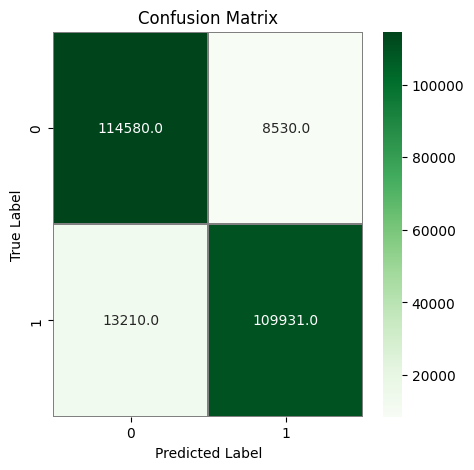

f1-score macro:
0.9116846171111669
precision_score macro:
0.9123102291597989
recall_score macro:
0.9117184856526362
              precision    recall  f1-score   support

           0       0.90      0.93      0.91    123110
           1       0.93      0.89      0.91    123141

    accuracy                           0.91    246251
   macro avg       0.91      0.91      0.91    246251
weighted avg       0.91      0.91      0.91    246251



In [ ]:
# train data
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(y_train, Y_pred):
    confusion_mtx = confusion_matrix(y_train, Y_pred)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(data['y_train'], train_predictions)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("f1-score macro:")
print(f1_score(data['y_train'], train_predictions, average="macro"))
print("precision_score macro:")
print(precision_score(data['y_train'], train_predictions, average="macro"))
print("recall_score macro:")
print(recall_score(data['y_train'], train_predictions, average="macro"))

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(data['y_train'], train_predictions))

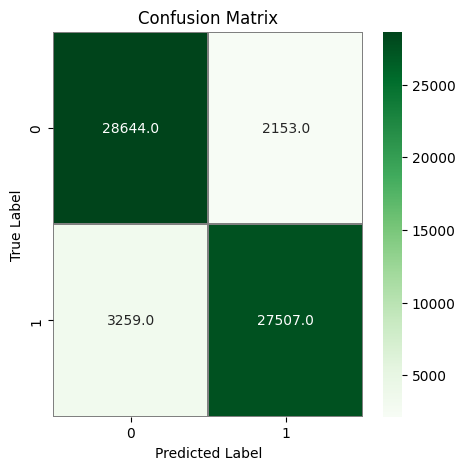

f1-score macro:
0.9120600578001453
precision_score macro:
0.9126286257891181
recall_score macro:
0.9120809853671191
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     30797
           1       0.93      0.89      0.91     30766

    accuracy                           0.91     61563
   macro avg       0.91      0.91      0.91     61563
weighted avg       0.91      0.91      0.91     61563



In [ ]:
# test data
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(y_test, Y_pred):
    confusion_mtx = confusion_matrix(y_test, Y_pred)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(data['y_test'], test_predictions)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("f1-score macro:")
print(f1_score(data['y_test'], test_predictions, average="macro"))
print("precision_score macro:")
print(precision_score(data['y_test'], test_predictions, average="macro"))
print("recall_score macro:")
print(recall_score(data['y_test'], test_predictions, average="macro"))

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(data['y_test'], test_predictions))

dict_keys(['loss', 'accuracy'])


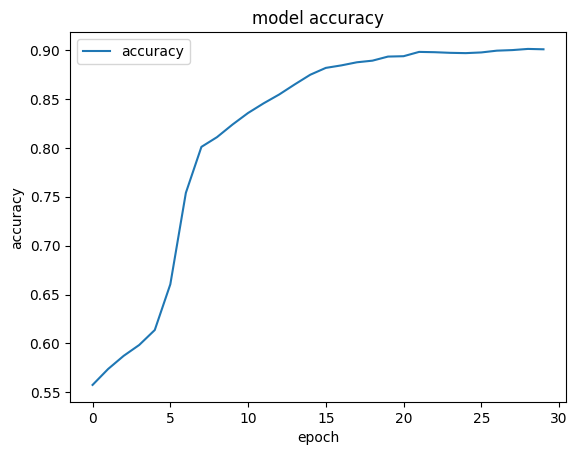

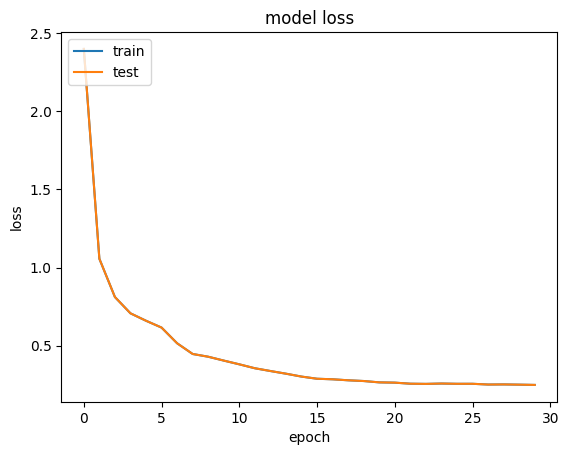

In [ ]:
# test data
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    # plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
history2(hist)